<a href="https://colab.research.google.com/github/yamkas/User-interest-pattern-analysis/blob/main/Analisis_pola_peminatan_pengguna_kelas_pelatihan_kerja_pada_platform_MasaDepan_ku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINK AKSES DATASET**

In [ ]:
# Untuk DataSetnya Bisa di akses pada link di bawah ini :

# Link Raw DataSet : https://drive.google.com/file/d/1jpkxyDOZVFcJvM_iYP4TIcT79m8yStJX/view?usp=sharing

# Link Clean Dataset : https://docs.google.com/spreadsheets/d/1JpwkJiLupEQC-ii7zpZ67V7z5b4g9IBF/edit?usp=sharing&ouid=105724352090808311785&rtpof=true&sd=true

# **PERSIAPAN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **CLEANING DATA**

## **Langkah 1 = Eksplorasi Data Awal**

In [ ]:
df_pd4 = pd.read_csv('Project 4 _ Analisis pola peminatan pengguna kelas pelatihan kerja pada platform MasaDepan.ku..csv')

In [ ]:
df_pd4.shape

(5430, 16)

In [ ]:
df_pd4.head(5)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-23 3:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23 0:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23 0:00:00,2023-09-18 16:15:18,2020-04-24 0:31:27,52,55,100.0,5.0,Sangat baik.


In [ ]:
df_pd4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_pendaftaran          5430 non-null   int64  
 1   id_pengguna             5430 non-null   object 
 2   nama_pengguna           5430 non-null   object 
 3   tanggal_lahir           5364 non-null   object 
 4   jenis_kelamin           5430 non-null   object 
 5   id_kelas                5430 non-null   object 
 6   nama_kelas              5430 non-null   object 
 7   bidang_studi            5430 non-null   object 
 8   tanggal_mendaftar       5430 non-null   object 
 9   tanggal_terakhir_akses  5430 non-null   object 
 10  tanggal_menyelesaikan   4912 non-null   object 
 11  aktivitas_selesai       5430 non-null   int64  
 12  total_aktivitas         5430 non-null   int64  
 13  skor_akhir              4600 non-null   float64
 14  rating_kelas            4909 non-null   

In [ ]:
df_pd4.describe()

,id_pendaftaran,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas
count,5430.000000,5430.000000,5430.000000,4600.000000,4909.000000
mean,2715.500000,30.884162,38.681768,75.102389,4.901406
std,1567.650312,24.698000,24.732215,26.039682,0.386793
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1358.250000,13.000000,19.000000,73.000000,5.000000
50%,2715.500000,23.000000,29.000000,82.500000,5.000000
75%,4072.750000,48.000000,64.000000,90.000000,5.000000
max,5430.000000,161.000000,162.000000,100.000000,5.000000


## **Langkah 2 = Pengecekan Missing Value**

In [ ]:
# melihat informasi data kita dan juga bisa melihat missing value dari semua kolom
df_pd4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_pendaftaran          5430 non-null   int64  
 1   id_pengguna             5430 non-null   object 
 2   nama_pengguna           5430 non-null   object 
 3   tanggal_lahir           5364 non-null   object 
 4   jenis_kelamin           5430 non-null   object 
 5   id_kelas                5430 non-null   object 
 6   nama_kelas              5430 non-null   object 
 7   bidang_studi            5430 non-null   object 
 8   tanggal_mendaftar       5430 non-null   object 
 9   tanggal_terakhir_akses  5430 non-null   object 
 10  tanggal_menyelesaikan   4912 non-null   object 
 11  aktivitas_selesai       5430 non-null   int64  
 12  total_aktivitas         5430 non-null   int64  
 13  skor_akhir              4600 non-null   float64
 14  rating_kelas            4909 non-null   

In [ ]:
# hitung jumlah missing value pada setiap kolom
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,66
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


In [ ]:
# hitung proporsi pada setiap kolom yang bernilai missing value
(df_pd4.isna().sum() / df_pd4.shape[0]) * 100

,0
id_pendaftaran,0.000000
id_pengguna,0.000000
nama_pengguna,0.000000
tanggal_lahir,1.215470
jenis_kelamin,0.000000
id_kelas,0.000000
nama_kelas,0.000000
bidang_studi,0.000000
tanggal_mendaftar,0.000000
tanggal_terakhir_akses,0.000000


In [ ]:
# filter dataframe untuk menampilkan baris value dengan nilai null pada kolom tertentu
df_pd4[df_pd4['tanggal_lahir'].isna()].head(5)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
212,213,2e55af0adda346fa22decf566830e23d,ram*****,NaN,Male,a146f6d0b54c507b6a9e2c3ee741ab2e,Men*******************************************...,Pendidikan & Pelatihan,2020-05-20 0:00:00,2023-09-18 16:15:18,2020-05-21 2:15:39,18,25,84.0,4.0,penjelasan belum detail seperti cara penggunaa...
240,241,bfbb26cfd859780e82c3b35875c62d47,Non********,NaN,Female,93c2f1ba99083d5e25025e31948ca428,Bis*******************,Bisnis Manajemen,2020-05-31 0:00:00,2023-09-18 16:15:18,2020-07-09 5:53:20,25,45,0.0,5.0,Progam nya sangat membantu saya bisa menambah ...
1006,1007,7abcd0bbfc6baf25a86aa07d9141c94f,Ali********,NaN,Male,bc4ba354bb374f4c0b6d5761aa0fbe45,Tut*******************************************...,Kecantikan Dasar,2020-09-15 0:00:00,2020-09-24 8:50:29,2020-09-18 7:36:54,14,14,40.0,5.0,saya sangat senang belajar di tutorial membuka...
1137,1138,632bc511416d02b76c007d0f6ade3a52,pip****************,NaN,Female,262cf9b725395d261f41ca335b0418c5,Men*******************************************...,Bisnis Manajemen,2020-09-19 0:00:00,2020-10-06 0:38:42,2020-10-06 0:38:42,20,29,100.0,5.0,bermanfaat untuk saya yang buta ms word
1186,1187,5bfc172fade2e428afafcb0cc4a83bc6,rir*************,NaN,Perempuan,c2406df6d6608aa077c76e05ca228d14,Pen**************************,Kecantikan Dasar,2020-09-22 0:00:00,2023-09-18 16:15:18,NaN,6,10,NaN,NaN,NaN


In [ ]:
df_pd4[df_pd4['tanggal_menyelesaikan'].isna()].head(5)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
178,179,6c148c163210c5684f8d3d233d408eec,Rem****************,1997-09-29,Perempuan,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Pendidikan & Pelatihan,2020-05-15 0:00:00,2023-09-18 16:15:18,NaN,2,24,0.0,NaN,NaN
190,191,5745928a7da718c43bfcee831c67b37c,Jup********,1997-07-22,Male,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Bisnis Layanan,2020-05-16 0:00:00,2023-09-18 16:15:18,NaN,6,24,4.0,NaN,NaN
205,206,c2ca91cf34f54182f1cc9b9babcf2dce,BAY******************,1996-01-07,Laki-laki,9f8b09ff9533b532a21d15ce4142df2e,MAS*****************************************,Pendidikan & Pelatihan,2020-05-19 0:00:00,2023-09-18 16:15:18,NaN,3,15,0.0,NaN,NaN
213,214,baad3bab9e548c2381f9079ad9905659,Adn********,1973-03-23,Male,5b722fa137cdaf9928b4eefe9d4d7adf,Mer**************************,Pendidikan & Pelatihan,2020-05-21 0:00:00,2023-09-18 16:15:18,NaN,18,23,13.0,NaN,NaN
244,245,8c7c2b6dc6af2c4959b64ff8490ecfda,FAH********,2020-05-28,Laki-laki,27bb8f622d2e847306c089c744c1ff8e,Har**********************************,Bimbingan Konseling,2020-06-01 0:00:00,2023-09-18 16:15:18,NaN,9,10,70.0,NaN,NaN


In [ ]:
df_pd4[df_pd4['skor_akhir'].isna()].head(5)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
110,111,4aa59018c7a90424628640689230cabd,Yus***,1999-12-29,Male,262cf9b725395d261f41ca335b0418c5,Men*******************************************...,Bisnis Layanan,2020-05-10 0:00:00,2023-09-18 16:15:18,2020-09-11 3:23:36,0,29,NaN,5.0,bagus sii kali belajar offline lebih mengerti ...
352,353,d6d0c601bab1bc33e860cd8e65b2ba6d,Ame*************,1997-01-13,Female,feecfe67ba84ce62086fc9e151fdd589,Kel****************************************,Pendidikan & Pelatihan,2020-08-22 0:00:00,2023-09-18 16:15:18,2020-08-25 17:09:15,0,10,NaN,4.0,Teori yang diberikan sangat bagus dan sangat m...
364,365,522aa040ef998dd43baa4ff040f69b89,Ula******,1997-07-16,Perempuan,7463e235f2937e3e5fdf254c29e8cc5f,Kel******************************************,Bahasa,2020-08-22 0:00:00,2023-09-18 16:15:18,2020-08-26 15:12:53,0,20,NaN,5.0,Progam pelatihan ini sangat baik untuk di ikuti
374,375,fd286b00c984444a609df8f5baecbd70,Dew**********,1999-09-09,Female,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-08-24 0:00:00,2023-09-18 16:15:18,2020-08-26 13:09:00,0,18,NaN,5.0,Muantaapppp
375,376,583f5cec293b048cf49cb187b31bfa87,Ria****************,1996-05-26,Female,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-08-24 0:00:00,2023-09-18 16:15:18,2020-08-26 13:17:02,0,18,NaN,5.0,Pembelajaran yang sangat bisa membantu dalam k...


In [ ]:
df_pd4[df_pd4['rating_kelas'].isna()].head(5)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
160,161,8d45eb827805a2d52d6f4430714d75a5,A R********,1994-03-21,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa,2020-05-13 0:00:00,2023-09-18 16:15:18,2020-05-18 17:46:02,28,28,100.0,NaN,NaN
178,179,6c148c163210c5684f8d3d233d408eec,Rem****************,1997-09-29,Perempuan,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Pendidikan & Pelatihan,2020-05-15 0:00:00,2023-09-18 16:15:18,NaN,2,24,0.0,NaN,NaN
190,191,5745928a7da718c43bfcee831c67b37c,Jup********,1997-07-22,Male,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Bisnis Layanan,2020-05-16 0:00:00,2023-09-18 16:15:18,NaN,6,24,4.0,NaN,NaN
205,206,c2ca91cf34f54182f1cc9b9babcf2dce,BAY******************,1996-01-07,Laki-laki,9f8b09ff9533b532a21d15ce4142df2e,MAS*****************************************,Pendidikan & Pelatihan,2020-05-19 0:00:00,2023-09-18 16:15:18,NaN,3,15,0.0,NaN,NaN
213,214,baad3bab9e548c2381f9079ad9905659,Adn********,1973-03-23,Male,5b722fa137cdaf9928b4eefe9d4d7adf,Mer**************************,Pendidikan & Pelatihan,2020-05-21 0:00:00,2023-09-18 16:15:18,NaN,18,23,13.0,NaN,NaN


In [ ]:
df_pd4[df_pd4['review_kelas'].isna()].head(5)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
160,161,8d45eb827805a2d52d6f4430714d75a5,A R********,1994-03-21,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa,2020-05-13 0:00:00,2023-09-18 16:15:18,2020-05-18 17:46:02,28,28,100.0,NaN,NaN
178,179,6c148c163210c5684f8d3d233d408eec,Rem****************,1997-09-29,Perempuan,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Pendidikan & Pelatihan,2020-05-15 0:00:00,2023-09-18 16:15:18,NaN,2,24,0.0,NaN,NaN
190,191,5745928a7da718c43bfcee831c67b37c,Jup********,1997-07-22,Male,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Bisnis Layanan,2020-05-16 0:00:00,2023-09-18 16:15:18,NaN,6,24,4.0,NaN,NaN
205,206,c2ca91cf34f54182f1cc9b9babcf2dce,BAY******************,1996-01-07,Laki-laki,9f8b09ff9533b532a21d15ce4142df2e,MAS*****************************************,Pendidikan & Pelatihan,2020-05-19 0:00:00,2023-09-18 16:15:18,NaN,3,15,0.0,NaN,NaN
213,214,baad3bab9e548c2381f9079ad9905659,Adn********,1973-03-23,Male,5b722fa137cdaf9928b4eefe9d4d7adf,Mer**************************,Pendidikan & Pelatihan,2020-05-21 0:00:00,2023-09-18 16:15:18,NaN,18,23,13.0,NaN,NaN


## **Langkah 3 = Imputasi / Mengisi Missing Value**

### Imputasi Missing Value pada Kolom *rating_kelas*

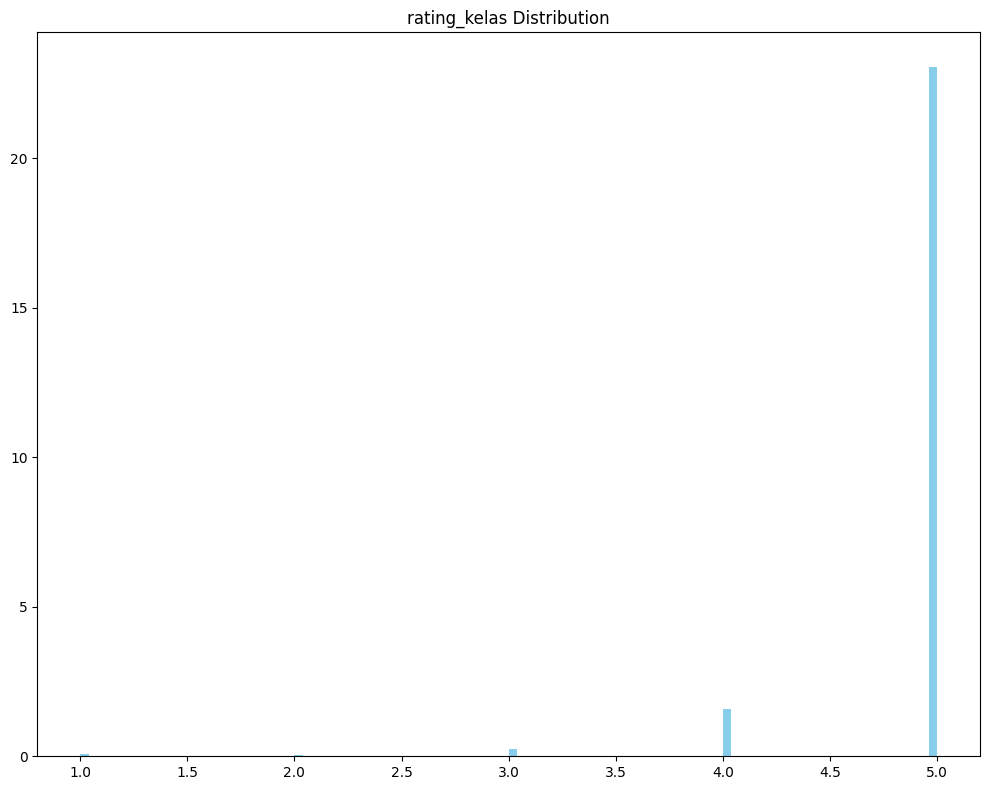

In [ ]:
#cek distribusi data yang terdapat missing value
plt.figure(figsize=(10, 8))

# Plot histogram for Income
plt.hist(df_pd4['rating_kelas'], bins=100, density=True, color='skyblue')
plt.title('rating_kelas Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Menyimpan nilai median pada kolom rating kelas
median_rating_kelas = df_pd4 ['rating_kelas'].median()
print(f"Nilai median pada kolom rating kelas : {median_rating_kelas}")

Nilai median pada kolom rating kelas : 5.0


In [ ]:
# Kemudian kita isikan hasil dari median tersebut pada missing value
df_pd4['rating_kelas'] = df_pd4['rating_kelas'].fillna(median_rating_kelas)

In [ ]:
# Lalu kita cek jumlah missing value pada kolom rating kelas
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,66
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


### Imputasi Missing Value pada Kolom *review_kelas*

In [ ]:
# Mengisi missing value pada kolom review kelas menggunakan modus
# Menyimpan nilai modus pada kolom review kelas
modus_review_kelas = df_pd4['review_kelas'].mode()[0]
print(f"Nilai modus pada kolom review kelas : {modus_review_kelas}")

Nilai modus pada kolom review kelas : kelas sangat menarik


In [ ]:
# Kemudian kita isikan hasil dari modus tersebut pada missing value
df_pd4['review_kelas'] = df_pd4['review_kelas'].fillna(modus_review_kelas)

In [ ]:
# Lalu kita cek jumlah missing value pada kolom rating kelas
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,66
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


###Imputasi Missing Value pada Kolom *tanggal_lahir*

In [ ]:
# Mari kita hapus baris data yang nilainya NaN atau Missing Value
df_pd4.dropna(subset=['tanggal_lahir'], inplace=True)

In [ ]:
# Lalu kita cek jumlah missing value pada kolom rating kelas
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


### Imputasi Missing Value pada Kolom *skor_akhir*

Pada missing value kolom **skor_akhir**, kita memutuskan untuk mengisi nilai "0" apabila data dari **tanggal_menyelesaikan** juga bernilai "0".

In [ ]:
# Lalu kita cek jumlah missing value pada kolom rating kelas
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


In [ ]:
# replace nilai pada skor akhir yang perhitungannya salah
mask = df_pd4['skor_akhir'].notna()
df_pd4.loc[mask, 'skor_akhir'] = ((df_pd4.loc[mask, 'aktivitas_selesai'] / df_pd4.loc[mask, 'total_aktivitas']) * 100).apply(np.floor)

In [ ]:
# mengisi missing value pada kolom skor dengan membagi nilai pada kolom ativitas selesai dengan total aktivitas lalu dikalikan dengan 100
df_pd4['skor_akhir'].fillna(((df_pd4['aktivitas_selesai'] / df_pd4['total_aktivitas']) * 100).apply(np.floor), inplace=True)

In [ ]:
# mengisi missing value pada kolom skor_akhir yang jika aktivitas selesai 0 maka skor akhir adalah 0
df_pd4['skor_akhir'] = df_pd4.apply(lambda row: 0 if row['aktivitas_selesai'] == 0 else row['skor_akhir'], axis=1)

In [ ]:
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


In [ ]:
df_pd4.head(3)

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,60.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,100.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-23 3:37:14,28,28,100.0,5.0,Menarik


### Imputasi Missing Value pada Kolom *tanggal_menyelesaikan*

In [ ]:
#kita cek jumlah missing value pada kolom tanggal_menyelesaikan
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


In [ ]:
# mengisi missing value dengan modus
modus_tanggal_menyelesaikan = df_pd4['tanggal_menyelesaikan'].mode()[0]
df_pd4['tanggal_menyelesaikan'].fillna(modus_tanggal_menyelesaikan, inplace=True)
print(f"Jumlah baris data kita sekarang adalah {df_pd4.shape[0]}")

Jumlah baris data kita sekarang adalah 5364


In [ ]:
df_pd4.isna().sum()

,0
id_pendaftaran,0
id_pengguna,0
nama_pengguna,0
tanggal_lahir,0
jenis_kelamin,0
id_kelas,0
nama_kelas,0
bidang_studi,0
tanggal_mendaftar,0
tanggal_terakhir_akses,0


## **Langkah 4 = Pengecekan Data Duplikat**

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita
print(f"Terdapat {df_pd4.duplicated().sum()} baris duplikat di data kita")

Terdapat 0 baris duplikat di data kita


## **Langkah 5 = Pengecekan Data Typos**

Untuk nama kolom `id_pendaftaran, id_pengguna, nama_pengguna, dan tanggal lahir` menurut kami sudah benar karena untuk data yang berhubungan dengan **id** disini tidak dapat diubah karena data tersebut sudah otomatis dari sistem. Kemudian pada data **nama dan tanggal lahir** juga sudah benar karena pada data ini diisikan oleh user.

### Pengecekan Kolom *jenis_kelamin*

In [ ]:
# mari kita lihat isi
df_pd4['jenis_kelamin'].unique().tolist()

['Perempuan', 'Laki-laki', 'Male', 'Female']

In [ ]:
# Daftar kata yang ingin diganti
handling_typo = {'Male': 'Laki-laki', 'Female': 'Perempuan'}

# Menggunakan metode .replace() untuk mengganti nilai
df_pd4['jenis_kelamin'].replace(handling_typo, inplace=True)

In [ ]:
# mari kita cek setelah handling typo
df_pd4['jenis_kelamin'].unique().tolist()

['Perempuan', 'Laki-laki']

Karena pada kolom **jenis_kelamin** awalnya berisikan data `'Perempuan', 'Laki-laki', 'Male', 'Female'` disini kita harus memilih salah satu penyebutan pada kolom jenis kelamin. Kami memilih untuk menggunakan data `'Perempuan' dan 'Laki-laki'` karena pada data ini menggunakan pengejaan dalam bahasa indonesia.

### Pengecekan Kolom *nama_kelas*

In [ ]:
# mari kita cek setelah handling typo
df_pd4['nama_kelas'].unique().tolist()

['Pan**************************',
 'Kel*********************************************',
 'Kel*******************************************',
 'Men*******************************************',
 'Mud*******************************',
 'Res*********************************************',
 'Bis*******************',
 'Kel*************************************',
 'Cep*********************************************',
 'Mem************************************************',
 '7 K***********************************************',
 'Web*******',
 'Dig**************',
 'Pel*******************',
 'Tek**************************************',
 'Pro**********************************************',
 'Kom*****************',
 'Kel******************************************',
 'Mud*************************************************',
 'Cep***********************************',
 'Mem**************************************',
 'Kia*************************',
 'Des************************************************',
 'Kar****

### Pengecekan Kolom *bidang_studi*

In [ ]:
df_pd4['bidang_studi'].unique().tolist()

['Pemasaran',
 'Pendidikan & Pelatihan',
 'Bahasa Inggris',
 'Digital & Teknologi',
 'Soft Skills',
 'Bisnis Layanan',
 'Jasa Boga',
 'Komputer Akuntansi',
 'Keuangan & Akuntansi',
 'Bisnis Manajemen',
 'Media & Komunikasi',
 'Komputer dan Jaringan Dasar',
 'Kreatif',
 'Bimbingan Konseling',
 'Produk Kreatif dan Kewirausahaan',
 'Dasar Desain Grafis',
 'Teknologi (IT)',
 'Ekonomi',
 'Ekonomi Bisnis',
 'Bisnis Online',
 'Pendidikan',
 'Praktik Pariwisata',
 'Literasi Media',
 'Desain Publikasi',
 'Desain & Seni',
 'Teknologi Terapan',
 'Desain Grafis Percetakan',
 'Aplikasi Perkantoran',
 'Desain Media Interaktif',
 'Self-Development',
 'Pengembangan Diri',
 'Bahasa',
 'Kecantikan Dasar',
 'Bahasa Indonesia',
 'Bahasa dan Sastra Inggris',
 'Bisnis E-commerce',
 'Matematika',
 'Tata Boga',
 'Pendidikan Agama',
 'Bahasa Asing Pilihan',
 'Produk Pastry dan Bakery',
 'Dasar Desain',
 'Komunikasi profesional',
 'Komunikasi Bisnis',
 'Bahasa Lainnya',
 'Prakarya',
 'Otomatisasi Tata Kelola Pe

### Pengecekan Kolom *aktivitas_selesai*

In [ ]:
df_pd4['aktivitas_selesai'].unique().tolist()

[15,
 18,
 28,
 10,
 52,
 16,
 25,
 22,
 14,
 17,
 6,
 11,
 21,
 20,
 3,
 2,
 4,
 7,
 9,
 27,
 8,
 12,
 13,
 1,
 0,
 26,
 29,
 19,
 23,
 30,
 44,
 31,
 24,
 5,
 32,
 47,
 55,
 36,
 40,
 67,
 34,
 43,
 33,
 123,
 70,
 37,
 53,
 46,
 66,
 54,
 74,
 42,
 56,
 57,
 107,
 93,
 64,
 68,
 61,
 71,
 48,
 38,
 69,
 85,
 98,
 50,
 39,
 45,
 110,
 62,
 94,
 58,
 78,
 65,
 82,
 41,
 51,
 49,
 90,
 83,
 72,
 92,
 35,
 73,
 59,
 60,
 79,
 80,
 99,
 63,
 76,
 116,
 77,
 113,
 130,
 87,
 84,
 86,
 75,
 95,
 89,
 103,
 96,
 81,
 104,
 100,
 161]

### Pengecekan Kolom *total_aktivitas*

In [ ]:
df_pd4['total_aktivitas'].unique().tolist()

[25,
 18,
 28,
 17,
 55,
 16,
 45,
 24,
 11,
 10,
 14,
 21,
 22,
 15,
 20,
 7,
 8,
 19,
 31,
 27,
 12,
 29,
 13,
 23,
 34,
 26,
 50,
 38,
 30,
 32,
 73,
 65,
 41,
 47,
 33,
 67,
 40,
 5,
 36,
 9,
 43,
 37,
 52,
 69,
 57,
 123,
 70,
 53,
 46,
 66,
 68,
 54,
 74,
 49,
 56,
 61,
 107,
 93,
 60,
 64,
 71,
 48,
 85,
 99,
 59,
 62,
 39,
 110,
 96,
 72,
 89,
 80,
 82,
 0,
 76,
 78,
 51,
 75,
 83,
 92,
 58,
 35,
 79,
 63,
 116,
 77,
 113,
 130,
 98,
 87,
 84,
 86,
 42,
 44,
 95,
 90,
 103,
 6,
 81,
 104,
 100,
 91,
 162]

### Pengecekan Kolom *skor_akhir*

In [ ]:
df_pd4['skor_akhir'].unique().tolist()

[60.0,
 100.0,
 58.0,
 94.0,
 55.0,
 91.0,
 90.0,
 37.0,
 64.0,
 66.0,
 10.0,
 18.0,
 40.0,
 87.0,
 47.0,
 48.0,
 71.0,
 51.0,
 29.0,
 41.0,
 75.0,
 80.0,
 43.0,
 38.0,
 44.0,
 72.0,
 0.0,
 82.0,
 92.0,
 65.0,
 76.0,
 8.0,
 50.0,
 25.0,
 20.0,
 78.0,
 86.0,
 31.0,
 6.0,
 89.0,
 61.0,
 28.0,
 63.0,
 5.0,
 9.0,
 7.0,
 4.0,
 42.0,
 95.0,
 68.0,
 70.0,
 36.0,
 52.0,
 93.0,
 81.0,
 12.0,
 79.0,
 96.0,
 21.0,
 27.0,
 26.0,
 57.0,
 34.0,
 85.0,
 11.0,
 33.0,
 14.0,
 83.0,
 17.0,
 56.0,
 73.0,
 53.0,
 23.0,
 3.0,
 19.0,
 2.0,
 45.0,
 30.0,
 88.0,
 32.0,
 46.0,
 16.0,
 74.0,
 84.0,
 39.0,
 15.0,
 35.0,
 67.0,
 69.0,
 98.0,
 1.0,
 59.0,
 97.0,
 24.0,
 77.0,
 62.0,
 22.0,
 99.0,
 13.0]

### Pengecekan Kolom *rating_kelas*

In [ ]:
df_pd4['rating_kelas'].unique().tolist()

[3.0, 4.0, 5.0, 1.0, 2.0]

## **Langkah 6 = Mengatasi Outlier**

untuk pengecekan outlier kita akan mengecek outlier pada kolom aktivitas_selesai, total_aktivitas, dan skor_akhir

[]

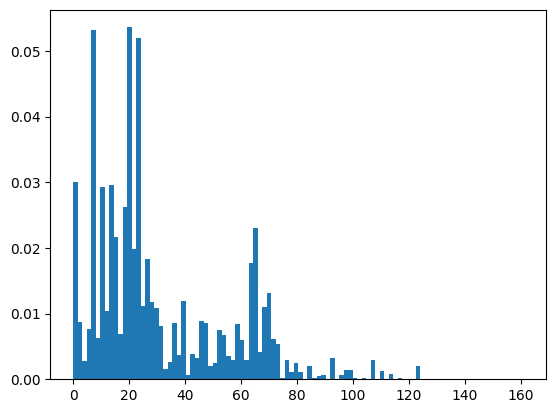

In [ ]:
# cek plot histogram aktivitas selesai untuk melihat skewnessnya
plt.hist(df_pd4['aktivitas_selesai'], density=True, bins=100)
plt.plot()

[]

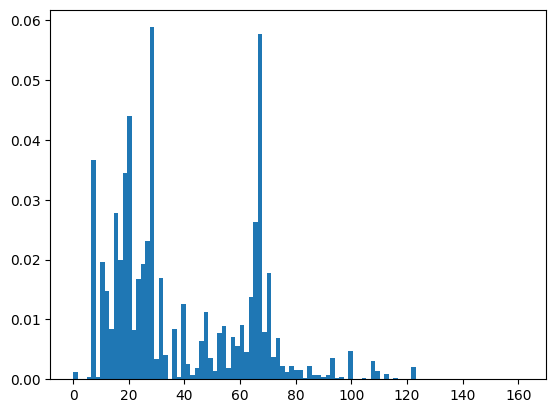

In [ ]:
# cek plot histogram total aktivitas untuk melihat skewnessnya
plt.hist(df_pd4['total_aktivitas'], density=True, bins=100)
plt.plot()

[]

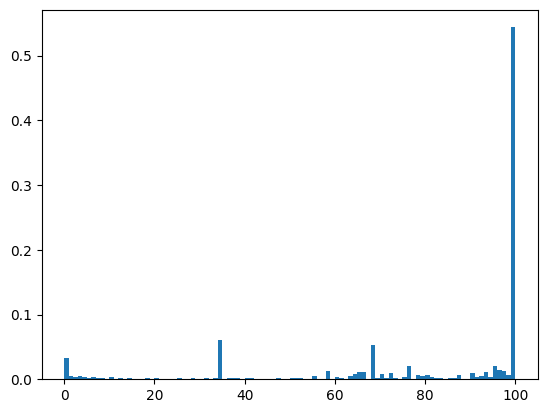

In [ ]:
# cek plot histogram skor akhir untuk melihat skewnessnya
plt.hist(df_pd4['skor_akhir'], density=True, bins=100)
plt.plot()

In [ ]:
# buat rumus IQR untuk menentukan outlier
def outlier(nama_kolom, batas):
  Q1 = np.percentile(df_pd4[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(df_pd4[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(df_pd4[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(df_pd4[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [ ]:
# cek outlier pada kolom aktivitas_selesai
upper_aktivitas_selesai = outlier('aktivitas_selesai', 'upper_bound')
lower_aktivitas_selesai= outlier('aktivitas_selesai', 'lower_bound')
print(f"Jumlah total outlier di kolom total aktivitas_selesai  : {len(upper_aktivitas_selesai ) + len(lower_aktivitas_selesai )}")

Jumlah total outlier di kolom total aktivitas_selesai  : 68


In [ ]:
# cek outlier pada kolom total_aktivitas
upper_total_aktivitas = outlier('total_aktivitas', 'upper_bound')
lower_total_aktivitas = outlier('total_aktivitas', 'lower_bound')
print(f"Jumlah total outlier di kolom total total_aktivitas  : {len(upper_total_aktivitas ) + len(lower_total_aktivitas )}")

Jumlah total outlier di kolom total total_aktivitas  : 1


In [ ]:
 # cek outlier pada kolom skor akhir
upper_skor_akhir = outlier('skor_akhir', 'upper_bound')
lower_skor_akhir = outlier('skor_akhir', 'lower_bound')
print(f"Jumlah total outlier di kolom total skor_akhir  : {len(upper_skor_akhir ) + len(lower_skor_akhir )}")

Jumlah total outlier di kolom total skor_akhir  : 399


In [ ]:
def hapus_outlier(df, nama_kolom):
    if nama_kolom == 'aktivitas_selesai':
        data_temp = df.loc[~df.index.isin(upper_aktivitas_selesai)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_aktivitas_selesai)]
        return data_temp
    if nama_kolom == 'total_aktivitas':
        data_temp = df.loc[~df.index.isin(upper_total_aktivitas)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_total_aktivitas)]
        return data_temp
    if nama_kolom == 'skor_akhir':
        data_temp = df.loc[~df.index.isin(upper_skor_akhir)]
        data_temp = data_temp.loc[~data_temp.index.isin(lower_skor_akhir)]
        return data_temp

In [ ]:
data_clean = hapus_outlier(df_pd4, 'aktivitas_selesai')
print(data_clean.shape)

(5298, 16)


In [ ]:
data_clean1 = hapus_outlier(data_clean, 'total_aktivitas')
print(data_clean1.shape)

(5298, 16)


In [ ]:
data_clean2 = hapus_outlier(data_clean1, 'skor_akhir')
print(data_clean2.shape)

(4905, 16)


In [ ]:
data_clean2.to_excel('Data_Clean_Project4_Karier_mu.xlsx', index=False)

# EDA (Exploratory Data Analysis)

saat melakukan EDA gunakan data yang sudah di cleaning

In [ ]:
data_clean2.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,60.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,100.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22 0:00:00,2023-09-18 16:15:18,2020-04-23 3:37:14,28,28,100.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23 0:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,58.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23 0:00:00,2023-09-18 16:15:18,2020-04-24 0:31:27,52,55,94.0,5.0,Sangat baik.


In [ ]:
data_clean2.describe()

,id_pendaftaran,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas
count,4905.000000,4905.000000,4905.000000,4905.000000,4905.000000
mean,2737.326606,31.213456,38.541692,81.917635,4.910703
std,1554.637684,24.364172,24.664940,27.876229,0.374255
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1401.000000,13.000000,19.000000,68.000000,5.000000
50%,2712.000000,23.000000,29.000000,100.000000,5.000000
75%,4089.000000,48.000000,64.000000,100.000000,5.000000
max,5430.000000,161.000000,162.000000,100.000000,5.000000


**Insight**

`1. Distribusi Peserta`
- `Jumlah Pendaftaran` : Terdapat 4905 pandaftaran dalam data clean yang telah dilakukan.

`2. Aktivitas Selesai dan Total Aktivitas`
- `Aktivitas Selesai`:
  - Ada peserta yang tidak menyelesaikan aktivitas sama sekali (0 aktivitas), namun ada juga yang menyelesaikan hingga 161 aktivitas.
  - Kuartil ke-1 (25%) dari peserta menyelesaikan minimal 13 aktivitas, dan kuartil ke-3 (75%) menyelesaikan hingga 48 aktivitas.
- `Total Aktivitas`:
  - Rata-rata total aktivitas setiap kelas adalah sekitar 38 aktivitas.
  - Ada kelas yang tidak memiliki aktivitas sama sekali (0 aktivitas), namun ada juga kelas yang memiliki aktivitas hingga 162 aktivitas.

`3. Skor Akhir`
  - Rata-rata skor akhir peserta adalah sekitar 81.9.
  - Skor minimum adalah 0 dan skor maksimum adalah 100.
  - Kuartil ke-1 (25%) dari peserta memiliki skor akhir setidaknya 68, dan kuartil ke-3 (75%) memiliki skor akhir 100.
  - Median (50%) skor akhir adalah 100, yang menunjukkan bahwa setengah dari peserta memiliki skor sempurna.

`4. Rating Kelas`
  - Rata-rata rating kelas adalah sekitar 4.91 dari maksimal 5.
  - Rating minimum adalah 1 dan rating maksimum adalah 5.
  - Sebagian besar peserta memberikan rating 5 untuk kelasnya (kuartil ke-1, median, dan kuartil ke-3 semuanya adalah 5).
  - Rating kelas yang sangat tinggi (rata-rata 4.91 dan mayoritas memberikan rating 5) menunjukkan kepuasan yang sangat baik terhadap kelas yang diikuti.

In [ ]:
data_clean2.shape

(4905, 16)

In [ ]:
data_clean2.count()

,0
id_pendaftaran,4905
id_pengguna,4905
nama_pengguna,4905
tanggal_lahir,4905
jenis_kelamin,4905
id_kelas,4905
nama_kelas,4905
bidang_studi,4905
tanggal_mendaftar,4905
tanggal_terakhir_akses,4905


In [ ]:
# cek jumlah data unik pada semua kolom
data_clean2.nunique()

,0
id_pendaftaran,4905
id_pengguna,4838
nama_pengguna,3873
tanggal_lahir,3848
jenis_kelamin,2
id_kelas,659
nama_kelas,414
bidang_studi,199
tanggal_mendaftar,3227
tanggal_terakhir_akses,3903


In [ ]:
# cek tipe data pada semua kolom
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4905 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_pendaftaran          4905 non-null   int64  
 1   id_pengguna             4905 non-null   object 
 2   nama_pengguna           4905 non-null   object 
 3   tanggal_lahir           4905 non-null   object 
 4   jenis_kelamin           4905 non-null   object 
 5   id_kelas                4905 non-null   object 
 6   nama_kelas              4905 non-null   object 
 7   bidang_studi            4905 non-null   object 
 8   tanggal_mendaftar       4905 non-null   object 
 9   tanggal_terakhir_akses  4905 non-null   object 
 10  tanggal_menyelesaikan   4905 non-null   object 
 11  aktivitas_selesai       4905 non-null   int64  
 12  total_aktivitas         4905 non-null   int64  
 13  skor_akhir              4905 non-null   float64
 14  rating_kelas            4905 non-null   float

In [ ]:
# ubah tipe data tanggal_lahir, tanggal_mendaftar, tanggal_terakhir_akses, dan tanggal_menyelesaikan menjadi datetime
kata_kunci = ['tanggal_lahir', 'tanggal_mendaftar', 'tanggal_terakhir_akses', 'tanggal_menyelesaikan']

for data in [data_clean2]:
  for date_to_datetime in data.columns :
    if any(keyword in date_to_datetime for keyword in kata_kunci):
      data[date_to_datetime ] = pd.to_datetime(data[date_to_datetime ])



In [ ]:
data_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4905 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          4905 non-null   int64         
 1   id_pengguna             4905 non-null   object        
 2   nama_pengguna           4905 non-null   object        
 3   tanggal_lahir           4905 non-null   datetime64[ns]
 4   jenis_kelamin           4905 non-null   object        
 5   id_kelas                4905 non-null   object        
 6   nama_kelas              4905 non-null   object        
 7   bidang_studi            4905 non-null   object        
 8   tanggal_mendaftar       4905 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  4905 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4905 non-null   datetime64[ns]
 11  aktivitas_selesai       4905 non-null   int64         
 12  total_aktivitas         4905 non-null   int64        

In [ ]:
# cek total keseluruhan jumlah pengguna
print('Jumlah Pengguna platform MasaDepan.ku berjumlah',data_clean2['id_pengguna'].nunique(), 'pengguna')

Jumlah Pengguna platform MasaDepan.ku berjumlah 4838 pengguna


In [ ]:
# cek total keseluruhan jumlah kelas
print('Jumlah kelas yang tersedia pada platform MasaDepan.ku adalah',data_clean2['id_kelas'].nunique(),'kelas')

Jumlah kelas yang tersedia pada platform MasaDepan.ku adalah 659 kelas


In [ ]:
# cek total keseluruhan bidang studi
print('Jumlah Keseluruhan bidang studi pada platform MasaDepan.ku adalah',data_clean2['bidang_studi'].nunique(), 'Bidang studi')

Jumlah Keseluruhan bidang studi pada platform MasaDepan.ku adalah 199 Bidang studi


**Insight**

- `Pengguna Aktif:` Meskipun jumlah pengguna platform adalah 4838, data pendaftaran menunjukkan lebih dari 4905 entri, menunjukkan bahwa ada pengguna yang aktif mengikuti lebih dari 1 kelas. Ini menunjukkan tingkat keterlibatan pengguna yang tinggi.

- `Ragam Kelas dan Bidang Studi:` Dengan 659 kelas dan 199 bidang studi, platform ini menawarkan banyak variasi, memungkinkan pengguna untuk memilih dari berbagai topik dan kelas.

##Cek total bidang studi selama pandemi >= april 2020 dan setelah pandemi >= 1 januari 2023

In [ ]:
# cek total bidang studi selama pandemi >= april 2020 dan setelah pandemi >= 1 januari 2023
selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] <= '2022-12-31']
setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2023-01-01']

selama_pandemi = len(selama_pandemi['bidang_studi'].unique())
setelah_pandemi = len(setelah_pandemi['bidang_studi'].unique())

print(f"Jumlah bidang studi selama pandemi: {selama_pandemi}")
print(f"Jumlah bidang studi setelah pandemi: {setelah_pandemi}")

Jumlah bidang studi selama pandemi: 180
Jumlah bidang studi setelah pandemi: 116


**Insight**
* `Jumlah Bidang Studi Selama Pandemi:` Selama pandemi (hingga Desember 2022), terdapat total 180 bidang studi yang tersedia di platform. Hal ini menunjukkan keragaman materi yang ditawarkan kepada pengguna selama periode tersebut.
* `Jumlah Bidang Studi Setelah Pandemi:` Setelah pandemi berakhir (mulai Januari 2023), jumlah bidang studi menurun menjadi 116. Ini bisa disebabkan oleh beberapa faktor, seperti penyesuaian platform terhadap perubahan kebutuhan atau permintaan pengguna, peningkatan fokus pada bidang studi yang paling diminati, atau perubahan strategi bisnis platform.

##Cek total keseluruhan bidang studi

In [ ]:
total_keseluruhan_bidang_studi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2020-01-01']

total_keseluruhan_bidang_studi = len(total_keseluruhan_bidang_studi['bidang_studi'].unique())

print(f"Jumlah total keseluruhan bidang studi: {total_keseluruhan_bidang_studi}")

Jumlah total keseluruhan bidang studi: 199


##Cek total keseluruhan kelas

In [ ]:
total_keseluruhan_kelas = data_clean2[data_clean2['tanggal_mendaftar'] >= '2020-01-01']

total_keseluruhan_kelas = len(total_keseluruhan_kelas['id_kelas'].unique())

print(f"Jumlah total keseluruhan kelas: {total_keseluruhan_kelas}")

Jumlah total keseluruhan kelas: 659


##Cek total kelas saat dan setelah pandemi

In [ ]:
selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] <= '2022-12-31']
setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2023-01-01']

selama_pandemi = len(selama_pandemi['id_kelas'].unique())
setelah_pandemi = len(setelah_pandemi['id_kelas'].unique())

print(f"Jumlah kelas selama pandemi: {selama_pandemi}")
print(f"Jumlah kelas setelah pandemi: {setelah_pandemi}")

Jumlah kelas selama pandemi: 511
Jumlah kelas setelah pandemi: 159


##Cek total keseluruhan pengguna

In [ ]:
total_keseluruhan_pengguna = data_clean2[data_clean2['tanggal_mendaftar'] >= '2020-01-01']

total_keseluruhan_pengguna = len(total_keseluruhan_pengguna['id_pengguna'].unique())

print(f"Jumlah total keseluruhan pengguna: {total_keseluruhan_pengguna}")

Jumlah total keseluruhan pengguna: 4838


##Cek total pengguna saat dan setelah pandemi

In [ ]:
selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] <= '2022-12-31']
setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2023-01-01']

selama_pandemi = len(selama_pandemi['id_pengguna'].unique())
setelah_pandemi = len(setelah_pandemi['id_pengguna'].unique())

print(f"Jumlah pengguna selama pandemi: {selama_pandemi}")
print(f"Jumlah pengguna setelah pandemi: {setelah_pandemi}")

Jumlah pengguna selama pandemi: 4423
Jumlah pengguna setelah pandemi: 415


##Cek total pendaftar keseluruhan

In [ ]:
total_keseluruhan_pendaftar = data_clean2[data_clean2['tanggal_mendaftar'] >= '2020-01-01']

total_keseluruhan_pendaftar = len(total_keseluruhan_pendaftar['id_pendaftaran'].unique())

print(f"Jumlah total keseluruhan pendaftar: {total_keseluruhan_pendaftar}")

Jumlah total keseluruhan pendaftar: 4905


##Cek total pendaftar selama pandemi dan setelah pandemi

In [ ]:
# cek total pendaftar selama pandemi dan setelah pandemi
selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] <= '2022-12-31']
setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2023-01-01']

selama_pandemi = len(selama_pandemi['id_pendaftaran'].unique())
setelah_pandemi = len(setelah_pandemi['id_pendaftaran'].unique())

print(f"Jumlah pendaftar selama pandemi: {selama_pandemi}")
print(f"Jumlah pendaftar setelah pandemi: {setelah_pandemi}")

Jumlah pendaftar selama pandemi: 4482
Jumlah pendaftar setelah pandemi: 423


**Insight**
* `Jumlah Pendaftar Selama Pandemi:` Selama pandemi (hingga Desember 2022), terdapat total 4482 pendaftar baru yang mendaftar pada platform. Ini menunjukkan bahwa meskipun ada tantangan yang dihadapi selama pandemi, masih banyak orang yang tertarik untuk mengakses dan menggunakan platform untuk keperluan pembelajaran. Karena pada saat pandemi sebagian besar aktivitas pembelajaran dilakukan secara online.

* `Jumlah Pendaftar Setelah Pandemi:` Setelah pandemi berakhir (mulai Januari 2023), jumlah pendaftar baru menurun menjadi 423. Penurunan ini dapat disebabkan oleh beberapa faktor, seperti perubahan dalam kebijakan atau strategi pemasaran, perubahan dalam preferensi atau kebutuhan pengguna setelah pandemi, atau sebagian kelas sudah dilaksanakan secara offline.

##Cek Durasi Hari Selama Pandemi dan Setelah Pandemi

In [ ]:
# cek durasi salama pandemi dari 2020-04-22 sampai 2022-12-12 berkisar berapa hari
tanggal_awal_pandemi = pd.to_datetime('2020-04-22')
tanggal_akhir_pandemi = pd.to_datetime('2022-12-12')
durasi_pandemi = (tanggal_akhir_pandemi - tanggal_awal_pandemi).days

print(f"durasi selama pandemi dari 2020-04-22 sampai 2022-12-12 adalah {durasi_pandemi} hari.")

# cek durasi setelah pandemi dari 2023-01-25 sampai 2023-10-21 berkisar berapa hari
tanggal_awal_setelah_pandemi = pd.to_datetime('2023-01-25')
tanggal_akhir_setelah_pandemi = pd.to_datetime('2023-10-21')
durasi_pandemi = (tanggal_akhir_setelah_pandemi - tanggal_awal_setelah_pandemi).days

print(f"durasi setelah pandemi dari 2023-01-25 sampai 2023-10-21 adalah {durasi_pandemi} hari.")

durasi selama pandemi dari 2020-04-22 sampai 2022-12-12 adalah 964 hari.
durasi setelah pandemi dari 2023-01-25 sampai 2023-10-21 adalah 269 hari.


**Insight**
- Durasi pandemi jauh lebih lama dibandingkan dengan periode setelah pandemi. Tepatnya, durasi pandemi (964 hari) hampir 3,6 kali lipat dari durasi setelah pandemi (269 hari).

##Cek rata rata pendaftar harian selama pandemi dan setelah pandemi

In [ ]:
# Cek rata rata pendaftar harian selama pandemi dan setelah pandemi
total_pendaftar_pandemi = 4423
jumlah_hari_pandemi = 964

total_pendaftar_setelah_pandemi = 415
jumlah_hari_setelah_pandemi = 269

rata_rata_pandemi = total_pendaftar_pandemi / jumlah_hari_pandemi

rata_rata_setelah_pandemi = total_pendaftar_setelah_pandemi / jumlah_hari_setelah_pandemi

# Menampilkan hasil
print(f"Rata-rata pendaftar harian selama pandemi: {rata_rata_pandemi}")
print(f"Rata-rata pendaftar harian setelah pandemi: {rata_rata_setelah_pandemi}")


Rata-rata pendaftar harian selama pandemi: 4.588174273858921
Rata-rata pendaftar harian setelah pandemi: 1.5427509293680297


**insight**
- Terjadi penurunan signifikan pada rata-rata pendaftar harian dari 4.588174273858921 selama pandemi menjadi 1.5427509293680297 setelah pandemi.

##Cek Total Jumlah Pengguna Pada Tahun 2020 sampai 2023

In [ ]:
# cek jumlah pengguna pada tahun 2020,2021,2022,2023
data_clean2['tanggal_mendaftar'] = pd.to_datetime(data_clean2['tanggal_mendaftar'])
data_clean2['tahun'] = data['tanggal_mendaftar'].dt.year

tahun_relevan = [2020, 2021, 2022, 2023]
data_filtered = data_clean2[data_clean2['tahun'].isin(tahun_relevan)]

pengguna_unik_per_tahun = data_filtered.groupby('tahun')['id_pengguna'].nunique().reset_index()
pengguna_unik_per_tahun.columns = ['Tahun', 'Jumlah Pengguna']

# Tampilkan hasil
print(pengguna_unik_per_tahun)

   Tahun  Jumlah Pengguna
0   2020             1532
1   2021             1757
2   2022             1135
3   2023              415


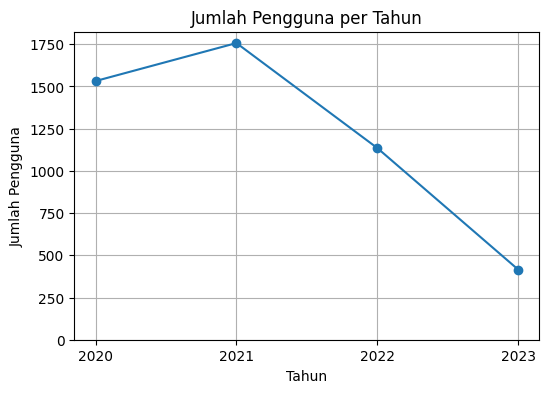

In [ ]:
# Buat plot
plt.figure(figsize=(6, 4))
plt.plot(pengguna_unik_per_tahun['Tahun'], pengguna_unik_per_tahun['Jumlah Pengguna'], marker='o', linestyle='-')

# Atur label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna per Tahun')

# Atur rentang sumbu x dan y
plt.xticks(pengguna_unik_per_tahun['Tahun'])
plt.ylim(0)

# Tampilkan plot
plt.grid(True)
plt.show()

**Insight**

`1. Tren Umum:` Terjadi fluktuasi jumlah pengguna selama periode 2020-2023. Jumlah pengguna meningkat dari tahun 2020 ke 2021, tetapi kemudian mengalami penurunan yang cukup signifikan pada tahun 2022 dan 2023.

`2. Peningkatan Awal:`

- `2020 ke 2021:` Jumlah pengguna meningkat dari 1532 menjadi 1757.
Peningkatan ini mungkin disebabkan oleh faktor-faktor seperti keterbatasan kegiatan diluar ruangan atau hal lainnya.

`3. Penurunan Signifikan:`

- `2021 ke 2022:` Jumlah pengguna menurun dari 1757 menjadi 1135, yang merupakan penurunan sebesar 35.4% (622 pengguna).

- `2022 ke 2023:` Penurunan berlanjut dari 1135 menjadi 415, yang berarti penurunan sebesar 63.4% (720 pengguna).
Penurunan yang drastis ini mungkin disebabkan oleh beberapa faktor


##Cek Persentase Keseluruhan Penyelesaian Kelas

In [ ]:
# Menentukan penyelesaian kelas berdasarkan apakah aktivitas_selesai sama dengan total_aktivitas
# Hitung jumlah penyelesaian dan ketidakselesaian kelas selama pandemi
selesai  = data_clean2[data_clean2['aktivitas_selesai'] == data_clean2['total_aktivitas']].shape[0]
tidak_selesai = data_clean2[data_clean2['aktivitas_selesai'] != data_clean2['total_aktivitas']].shape[0]
persentase = data_clean2.shape[0]

presentase_selesai = (selesai / persentase) * 100 if persentase > 0 else 0
presentase_tidak_selesai = (tidak_selesai / persentase) * 100 if persentase > 0 else 0

print(f"Persentase tingkat selesai kelas : {presentase_selesai:.2f}%")
print(f"Persentase tingkat tidak selesai kelas : {presentase_tidak_selesai:.2f}%")


Persentase tingkat selesai kelas : 55.92%
Persentase tingkat tidak selesai kelas : 44.08%


**Insight**

`Tingkat Penyelesaian Kelas:`
- 55.92% Pengguna menyelesaikan kelas, hal ini menunjukkan bahwa sedikit lebih dari setengah pengguna berhasil memenuhi persyaratan dan menyelesaikan kelas.
- 44.08% Pengguna tidak menyelesaikan kelas, hal ini mengindikasikan bahwa hampir separuh siswa tidak menyelesaikan kelas

### Standart Deviasi

In [ ]:
# Memilih kolom-kolom numerik
kolom_numerik = data_clean2[['aktivitas_selesai', 'total_aktivitas', 'skor_akhir']]

# Menghitung standar deviasi untuk setiap kolom
std_dev = kolom_numerik.std()

print("Standar Deviasi untuk Setiap Kolom:")
print(std_dev)

Standar Deviasi untuk Setiap Kolom:
aktivitas_selesai    24.364172
total_aktivitas      24.664940
skor_akhir           27.876229
dtype: float64


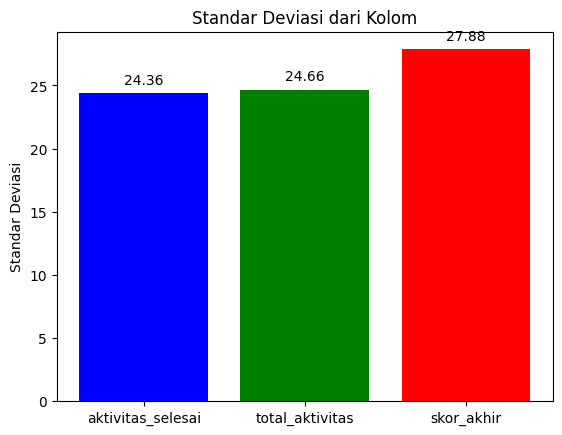

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumsi data_clean2 telah ada dan memiliki kolom yang relevan

# Menghitung standar deviasi untuk setiap kolom
std_aktivitas_selesai = data_clean2['aktivitas_selesai'].std()
std_total_aktivitas = data_clean2['total_aktivitas'].std()
std_skor_akhir = data_clean2['skor_akhir'].std()

# Data untuk chart
columns = ['aktivitas_selesai', 'total_aktivitas', 'skor_akhir']
std_values = [std_aktivitas_selesai, std_total_aktivitas, std_skor_akhir]

# Membuat chart
fig, ax = plt.subplots()
ax.bar(columns, std_values, color=['blue', 'green', 'red'])

# Menambahkan judul dan label
ax.set_title('Standar Deviasi dari Kolom')
ax.set_ylabel('Standar Deviasi')

# Menampilkan nilai di atas setiap batang
for i, v in enumerate(std_values):
    ax.text(i, v + 0.5, f"{v:.2f}", ha='center', va='bottom')

# Menampilkan chart
plt.show()

`1. Standar Deviasi Aktivitas Selesai (24.36):` Standar deviasi ini menunjukkan bahwa jumlah aktivitas selesai oleh peserta bervariasi cukup besar. Peserta mungkin menyelesaikan aktivitas dengan tingkat yang berbeda-beda, yang dapat disebabkan oleh berbagai faktor seperti motivasi, waktu yang tersedia, atau kesulitan aktivitas.

`2. Standar Deviasi Total Aktivitas (24.66):` Standar deviasi yang tinggi pada total aktivitas menunjukkan bahwa jumlah aktivitas yang diberikan dalam berbagai kelas juga bervariasi. Ini bisa mencerminkan perbedaan dalam kurikulum atau metodologi pengajaran yang digunakan oleh berbagai pengajar atau program.

`3. Standar Deviasi Skor Akhir (27.88):` Standar deviasi yang tinggi pada skor akhir menunjukkan bahwa ada perbedaan yang signifikan dalam pencapaian akhir peserta. Faktor-faktor yang mungkin mempengaruhi termasuk tingkat kesulitan kursus, dan efektivitas pengajaran.

### Korelasi Pearson

In [ ]:
# Memilih hanya kolom numerik
kolom_numerik = data_clean2.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi menggunakan metode Pearson
korelasi = kolom_numerik.corr()

print("Korelasi antar kolom numerik:")
print(korelasi)

Korelasi antar kolom numerik:
                   id_pendaftaran  aktivitas_selesai  total_aktivitas  \
id_pendaftaran           1.000000           0.480833         0.493026   
aktivitas_selesai        0.480833           1.000000         0.815210   
total_aktivitas          0.493026           0.815210         1.000000   
skor_akhir               0.142429           0.451468        -0.062766   
rating_kelas             0.018526          -0.010969         0.020572   

                   skor_akhir  rating_kelas  
id_pendaftaran       0.142429      0.018526  
aktivitas_selesai    0.451468     -0.010969  
total_aktivitas     -0.062766      0.020572  
skor_akhir           1.000000     -0.048103  
rating_kelas        -0.048103      1.000000  


**Insight**

1. `aktivitas_selesai` dengan `total_aktivitas`: Korelasi yang sangat tinggi (0.863) antara aktivitas_selesai dan total_aktivitas menunjukkan bahwa semakin banyak aktivitas yang diselesaikan oleh pengguna, semakin besar pula jumlah total aktivitas yang tersedia. Ini mungkin sesuai dengan harapan, karena total aktivitas yang lebih besar memberikan lebih banyak kesempatan bagi pengguna untuk menyelesaikan aktivitas.

2. `skor_akhir`: Korelasi antara skor_akhir dengan aktivitas_selesai (0.368) menunjukkan bahwa ada hubungan positif antara skor akhir pembelajaran dan jumlah aktivitas kelas yang diselesaikan. Namun, korelasi ini tidak terlalu kuat.

3. `rating_kelas`: Korelasi antara rating_kelas dengan skor_akhir (-0.032) menunjukkan korelasi negatif yang sangat kecil. Hal ini menunjukkan bahwa skor akhir pembelajaran dan rating kelas memiliki hubungan yang sangat lemah atau tidak ada hubungan.

### Regresi Linear

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Pemilihan Variabel Independen
# Misalnya, kita akan menggunakan 'aktivitas_selesai', 'total_aktivitas', dan 'rating_kelas'
X = data_clean2[['aktivitas_selesai', 'total_aktivitas', 'rating_kelas']]
y = data_clean2['skor_akhir']

# Pemisahan Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun Model Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan Prediksi
y_pred = model.predict(X_test)

# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 184.3806432824803


### IQR

In [ ]:
def calculate_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Menghitung IQR untuk setiap kolom numerik
iqr_values = data_clean2.select_dtypes(include=['number']).apply(calculate_iqr)

# Menampilkan IQR untuk setiap kolom numerik
print(iqr_values)

id_pendaftaran       2688.0
aktivitas_selesai      35.0
total_aktivitas        45.0
skor_akhir             32.0
rating_kelas            0.0
tahun                   2.0
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

##Berapa persen besar pengguna yang memiliki lebih dari 1 kelas yang diminati?

In [ ]:
# Menghitung jumlah dalam kolom 'id_pengguna'
count_distinct_id_pengguna = data_clean2['id_pengguna'].nunique()

print("Jumlah nilai unik dalam kolom 'id_pengguna':", count_distinct_id_pengguna)

Jumlah nilai unik dalam kolom 'id_pengguna': 4838


In [ ]:
# Menghitung jumlah kelas yang diikuti setiap pengguna
pengguna_kelas = defaultdict(int)
for index, pengguna in data_clean2.iterrows():
    pengguna_kelas[pengguna['id_pengguna']] += 1

# Menyaring pengguna yang telah ikut lebih dari satu kelas
pengguna_lebih_dari_satu_kelas = [pengguna_id for pengguna_id, jumlah_kelas in pengguna_kelas.items() if jumlah_kelas > 1]

# Menampilkan id_pengguna dan id_kelas dari pengguna yang telah mendaftar lebih dari satu kelas, diurutkan berdasarkan id_pengguna
for index, pengguna in sorted(data_clean2.iterrows(), key=lambda x: x[1]['id_pengguna']):
    if pengguna['id_pengguna'] in pengguna_lebih_dari_satu_kelas:
        print("ID Pengguna:", pengguna['id_pengguna'], "| ID Kelas:", pengguna['id_kelas'])


ID Pengguna: 051a13ebc7a1ab86c6b50fdc9f5850b3 | ID Kelas: f123f89566541e68378d4aaf0b15b6ff
ID Pengguna: 051a13ebc7a1ab86c6b50fdc9f5850b3 | ID Kelas: f123f89566541e68378d4aaf0b15b6ff
ID Pengguna: 05864fdc61af175404ea87aa6cc9bc59 | ID Kelas: 85deac299e10014ac54f9a4e32f230ef
ID Pengguna: 05864fdc61af175404ea87aa6cc9bc59 | ID Kelas: 85deac299e10014ac54f9a4e32f230ef
ID Pengguna: 06b333762067499ffdd614f1a105aedb | ID Kelas: 23b6cb2a4eb4359ee7856260651a98d5
ID Pengguna: 06b333762067499ffdd614f1a105aedb | ID Kelas: 23b6cb2a4eb4359ee7856260651a98d5
ID Pengguna: 086506c842909051d8083744dc16d907 | ID Kelas: d8860e4c689c9c9bfc6be871ca0001d9
ID Pengguna: 086506c842909051d8083744dc16d907 | ID Kelas: 85deac299e10014ac54f9a4e32f230ef
ID Pengguna: 0a96f9651a774192903ea67da52d3d8d | ID Kelas: cc5b9a5016afbaa3f966f42cb2754f18
ID Pengguna: 0a96f9651a774192903ea67da52d3d8d | ID Kelas: 766685db1285e78c89aa3149df66c7fe
ID Pengguna: 1200d04dfc3dc7155e1fab0224e6148d | ID Kelas: 2ad0b4a3c189a473c3960e3706417078

In [ ]:
# Menghitung jumlah pengguna yang telah mendaftar lebih dari satu kelas
jumlah_pengguna_lebih_dari_satu_kelas = len(pengguna_lebih_dari_satu_kelas)
print("Jumlah pengguna yang telah mendaftar lebih dari satu kelas:", jumlah_pengguna_lebih_dari_satu_kelas)

Jumlah pengguna yang telah mendaftar lebih dari satu kelas: 65


In [ ]:
# Menghitung jumlah kelas yang diikuti setiap pengguna
pengguna_kelas = defaultdict(int)
for index, pengguna in data_clean2.iterrows():
    pengguna_kelas[pengguna['id_pengguna']] += 1

# Menyaring pengguna yang telah ikut hanya satu kelas
pengguna_satu_kelas = [pengguna_id for pengguna_id, jumlah_kelas in pengguna_kelas.items() if jumlah_kelas <= 1]

# Menampilkan id_pengguna dan id_kelas dari pengguna yang telah mendaftar lebih dari satu kelas, diurutkan berdasarkan id_pengguna
for index, pengguna in sorted(data_clean2.iterrows(), key=lambda x: x[1]['id_pengguna']):
    if pengguna['id_pengguna'] in pengguna_lebih_dari_satu_kelas:
        print("ID Pengguna:", pengguna['id_pengguna'], "| ID Kelas:", pengguna['id_kelas'])

ID Pengguna: 051a13ebc7a1ab86c6b50fdc9f5850b3 | ID Kelas: f123f89566541e68378d4aaf0b15b6ff
ID Pengguna: 051a13ebc7a1ab86c6b50fdc9f5850b3 | ID Kelas: f123f89566541e68378d4aaf0b15b6ff
ID Pengguna: 05864fdc61af175404ea87aa6cc9bc59 | ID Kelas: 85deac299e10014ac54f9a4e32f230ef
ID Pengguna: 05864fdc61af175404ea87aa6cc9bc59 | ID Kelas: 85deac299e10014ac54f9a4e32f230ef
ID Pengguna: 06b333762067499ffdd614f1a105aedb | ID Kelas: 23b6cb2a4eb4359ee7856260651a98d5
ID Pengguna: 06b333762067499ffdd614f1a105aedb | ID Kelas: 23b6cb2a4eb4359ee7856260651a98d5
ID Pengguna: 086506c842909051d8083744dc16d907 | ID Kelas: d8860e4c689c9c9bfc6be871ca0001d9
ID Pengguna: 086506c842909051d8083744dc16d907 | ID Kelas: 85deac299e10014ac54f9a4e32f230ef
ID Pengguna: 0a96f9651a774192903ea67da52d3d8d | ID Kelas: cc5b9a5016afbaa3f966f42cb2754f18
ID Pengguna: 0a96f9651a774192903ea67da52d3d8d | ID Kelas: 766685db1285e78c89aa3149df66c7fe
ID Pengguna: 1200d04dfc3dc7155e1fab0224e6148d | ID Kelas: 2ad0b4a3c189a473c3960e3706417078

In [ ]:
# Menghitung jumlah pengguna yang telah mendaftar hanya satu kelas
jumlah_pengguna_yang_hanya_punya_satu_kelas = len(pengguna_satu_kelas)
print("Jumlah pengguna yang mendaftar hanya satu kelas:", jumlah_pengguna_yang_hanya_punya_satu_kelas)

Jumlah pengguna yang mendaftar hanya satu kelas: 4773


In [ ]:
# Menghitung total jumlah pengguna
total_pengguna = len(data_clean2['id_pengguna'].unique())
print("Jumlah pengguna pada saat ini :", total_pengguna)

Jumlah pengguna pada saat ini : 4838


In [ ]:
# Menghitung persentase pengguna yang telah mendaftar hanya satu kelas
persentase_pengguna_hanya_satu_kelas = (jumlah_pengguna_yang_hanya_punya_satu_kelas / total_pengguna) * 100

print("Persentase pengguna yang telah mendaftar hanya satu kelas:", persentase_pengguna_hanya_satu_kelas, "%")

Persentase pengguna yang telah mendaftar hanya satu kelas: 98.65646961554361 %


In [ ]:
# Menghitung persentase pengguna yang telah mendaftar lebih dari satu kelas
persentase_pengguna_lebih_dari_satu_kelas = (jumlah_pengguna_lebih_dari_satu_kelas / total_pengguna) * 100

print("Persentase pengguna yang telah mendaftar lebih dari satu kelas:", persentase_pengguna_lebih_dari_satu_kelas, "%")

Persentase pengguna yang telah mendaftar lebih dari satu kelas: 1.3435303844563868 %


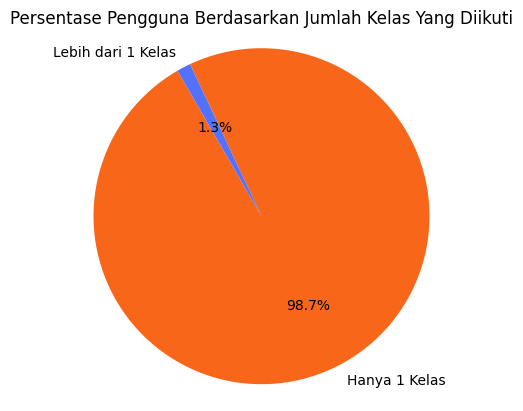

In [ ]:
# membuat piechart
labels = ['Hanya 1 Kelas', 'Lebih dari 1 Kelas']
sizes = [persentase_pengguna_hanya_satu_kelas, persentase_pengguna_lebih_dari_satu_kelas]
colors = ['#f76619', '#5271ff']  # Warna yang diinginkan

plt.pie(sizes, labels=labels,  colors=colors, autopct='%1.1f%%', startangle=120)
plt.title('Persentase Pengguna Berdasarkan Jumlah Kelas Yang Diikuti')
plt.axis('equal')  # Agar lingkaran terlihat proporsional
plt.show()

**Insight**

Terdapat 65 pengguna dari total 4838 pengguna yang telah mendaftar lebih dari satu kelas. Hal ini menghasilkan persentase pengguna yang memiliki **lebih dari satu kelas sebesar 1.3435303844563868%**.

Berdasarkan data yang diperoleh **sebagian besar pengguna** (98.65646961554361%) hanya mendaftar untuk satu kelas. Hal ini mungkin menunjukkan bahwa sebagian besar pengguna cenderung fokus pada satu topik atau minat dalam kursus atau platform yang diberikan, dan mungkin tidak merasa perlu untuk mendaftar untuk lebih dari satu kelas.

## Bidang studi apakah yang paling banyak diminati saat ( >= April 2020) dan setelah pandemi berakhir (>= 1 Januari 2023)?

In [ ]:
# Memisahkan Data Berdasarkan Waktu:
data_clean2['tanggal_mendaftar'] = pd.to_datetime(data_clean2['tanggal_mendaftar'])

selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] <= '2022-12-31']
setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2023-01-01']

In [ ]:
# Menghitung Jumlah Pendaftaran untuk Setiap Bidang Studi:
jumlah_selama_pandemi = selama_pandemi['bidang_studi'].value_counts()
jumlah_setelah_pandemic = setelah_pandemi['bidang_studi'].value_counts()

print("Bidang studi yang paling banyak diminati saat pandemi:")
print(jumlah_selama_pandemi.head(10))

print("\nBidang studi yang paling banyak diminati setelah pandemi:")
print(jumlah_setelah_pandemic.head(10))

Bidang studi yang paling banyak diminati saat pandemi:
bidang_studi
Pendidikan & Pelatihan              367
Bisnis Manajemen                    339
Digital & Teknologi                 251
Bisnis Layanan                      224
Bahasa Inggris                      140
Teknologi (IT)                      140
Soft Skills                         118
Pengembangan Diri                   118
Perencanaan Bisnis                  101
Pengolahan dan Penyajian Makanan     86
Name: count, dtype: int64

Bidang studi yang paling banyak diminati setelah pandemi:
bidang_studi
Administrasi Umum                      23
Marketing                              18
Bisnis Manajemen                       17
Komunikasi Bisnis                      16
Administrasi                           16
Dasar Desain Grafis                    15
Aplikasi Perkantoran                   12
Pendidikan & Pelatihan                 10
Otomatisasi Tata Kelola Perkantoran     9
Desain Grafis                           9
Name: count, d

**Insight**
1. `Bidang Studi yang Paling Banyak Diminati Selama Pandemi:` Selama pandemi, bidang studi yang paling banyak diminati adalah:
  *  Pendidikan & Pelatihan = 367
  *  Bisnis Manajemen = 339
  *  Digital & Teknologi = 251
  *  Bisnis Layanan = 224
  *  Teknologi (IT) = 140

Hal ini menunjukkan bahwa selama pandemi, banyak orang tertarik untuk meningkatkan keterampilan dalam bidang pendidikan, bisnis, dan teknologi, mungkin karena perubahan dalam kebutuhan pekerjaan atau minat pribadi dalam memperluas pengetahuan dan keterampilan.

2. `Bidang Studi yang Paling Banyak Diminati Setelah Pandemi:` Setelah pandemi berakhir, bidang studi yang paling banyak diminati berubah, dan yang paling banyak diminati adalah:
  *  Administrasi Umum: 23
  *  Marketing: 18
  *  Bisnis Manajemen: 17
  *  Administrasi: 16
  *  Dasar Desain Grafis: 15

Terjadi pergeseran minat dari bidang-bidang seperti pendidikan dan teknologi selama pandemi menjadi lebih beragam, dengan peningkatan minat dalam bidang administrasi, bisnis, dan desain grafis setelah pandemi berakhir.

## Bagaimana trend bulanan pendaftaran kelas untuk setiap bidang studi saat dan setelah pandemi?

In [ ]:
# Mengonversi kolom tanggal_mendaftar menjadi tipe datetime jika belum dilakukan
data_clean2['tanggal_mendaftar'] = pd.to_datetime(data_clean2['tanggal_mendaftar'])

In [ ]:
# cek total bidang studi selama pandemi >= april 2020 dan setelah pandemi >= 1 januari 2023
selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] <= '2022-12-31']
setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar'] >= '2023-01-01']

# Menambahkan kolom bulan_tahun untuk analisis tren bulanan
selama_pandemi['bulan_tahun'] = selama_pandemi['tanggal_mendaftar'].dt.to_period('M')
setelah_pandemi['bulan_tahun'] = setelah_pandemi['tanggal_mendaftar'].dt.to_period('M')

In [ ]:
# Menghitung jumlah pendaftaran bulanan untuk masing-masing bidang studi selama pandemi
trend_during_pandemic = selama_pandemi.groupby(['bulan_tahun', 'bidang_studi']).size().unstack(fill_value=0)

# Menghitung jumlah pendaftaran bulanan untuk masing-masing bidang studi setelah pandemi
trend_post_pandemic = setelah_pandemi.groupby(['bulan_tahun', 'bidang_studi']).size().unstack(fill_value=0)

In [ ]:
# Menghitung jumlah pendaftaran total untuk masing-masing bidang studi selama pandemi
total_during_pandemic = selama_pandemi['bidang_studi'].value_counts().head(10)

# Menghitung jumlah pendaftaran total untuk masing-masing bidang studi setelah pandemi
total_post_pandemic = setelah_pandemi['bidang_studi'].value_counts().head(10)

# Mengambil top 5 bidang studi selama pandemi
top5_during_pandemic = total_during_pandemic.index

# Mengambil top 5 bidang studi setelah pandemi
top5_post_pandemic = total_post_pandemic.index

In [ ]:
 #Menghitung jumlah pendaftaran bulanan untuk masing-masing bidang studi selama pandemi
trend_during_pandemic = selama_pandemi[selama_pandemi['bidang_studi'].isin(top5_during_pandemic)].groupby(['bulan_tahun', 'bidang_studi']).size().unstack(fill_value=0)

# Menghitung jumlah pendaftaran bulanan untuk masing-masing bidang studi setelah pandemi
trend_post_pandemic = setelah_pandemi[setelah_pandemi['bidang_studi'].isin(top5_post_pandemic)].groupby(['bulan_tahun', 'bidang_studi']).size().unstack(fill_value=0)


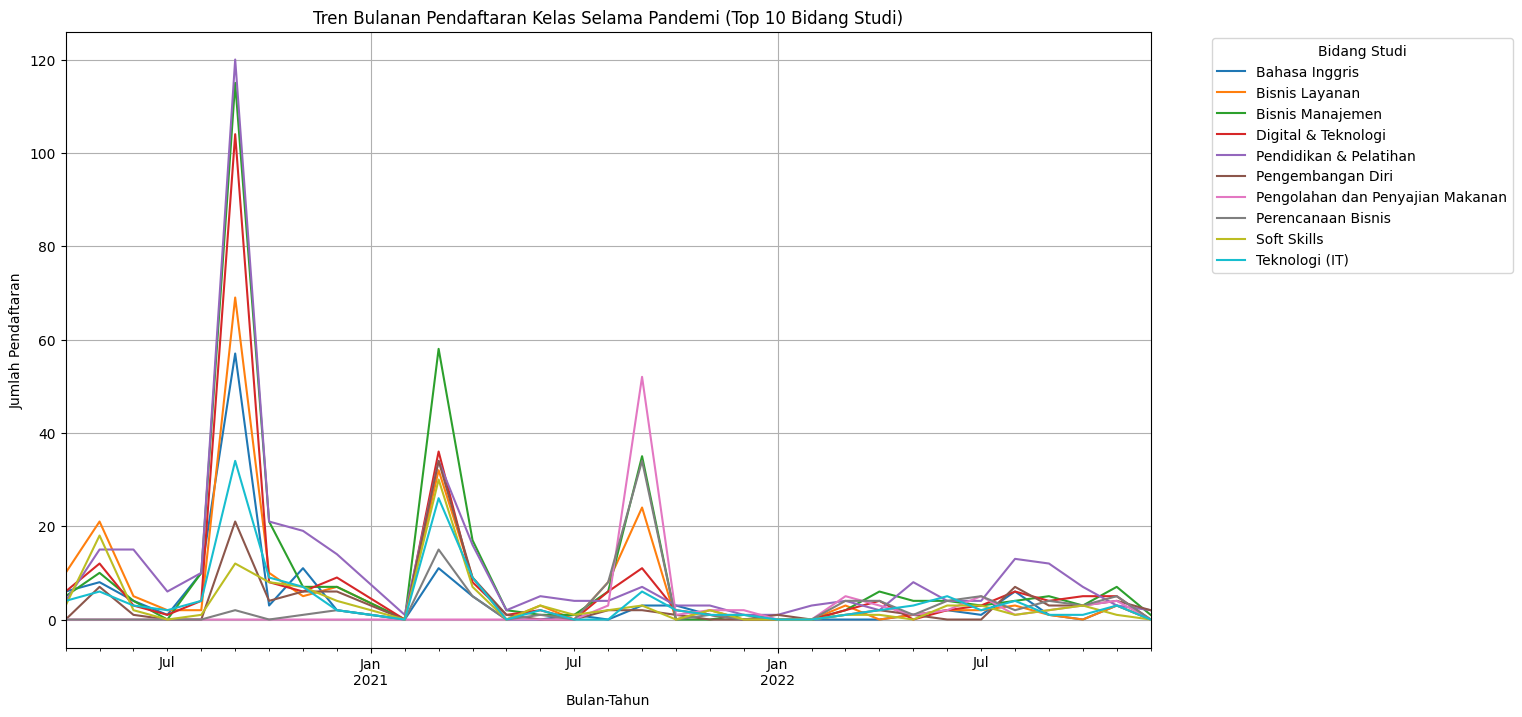

In [ ]:
# Plot tren bulanan selama pandemi untuk top 10 bidang studi
plt.figure(figsize=(14, 8))
trend_during_pandemic.plot(ax=plt.gca(), title='Tren Bulanan Pendaftaran Kelas Selama Pandemi (Top 10 Bidang Studi)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pendaftaran')
plt.legend(title='Bidang Studi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

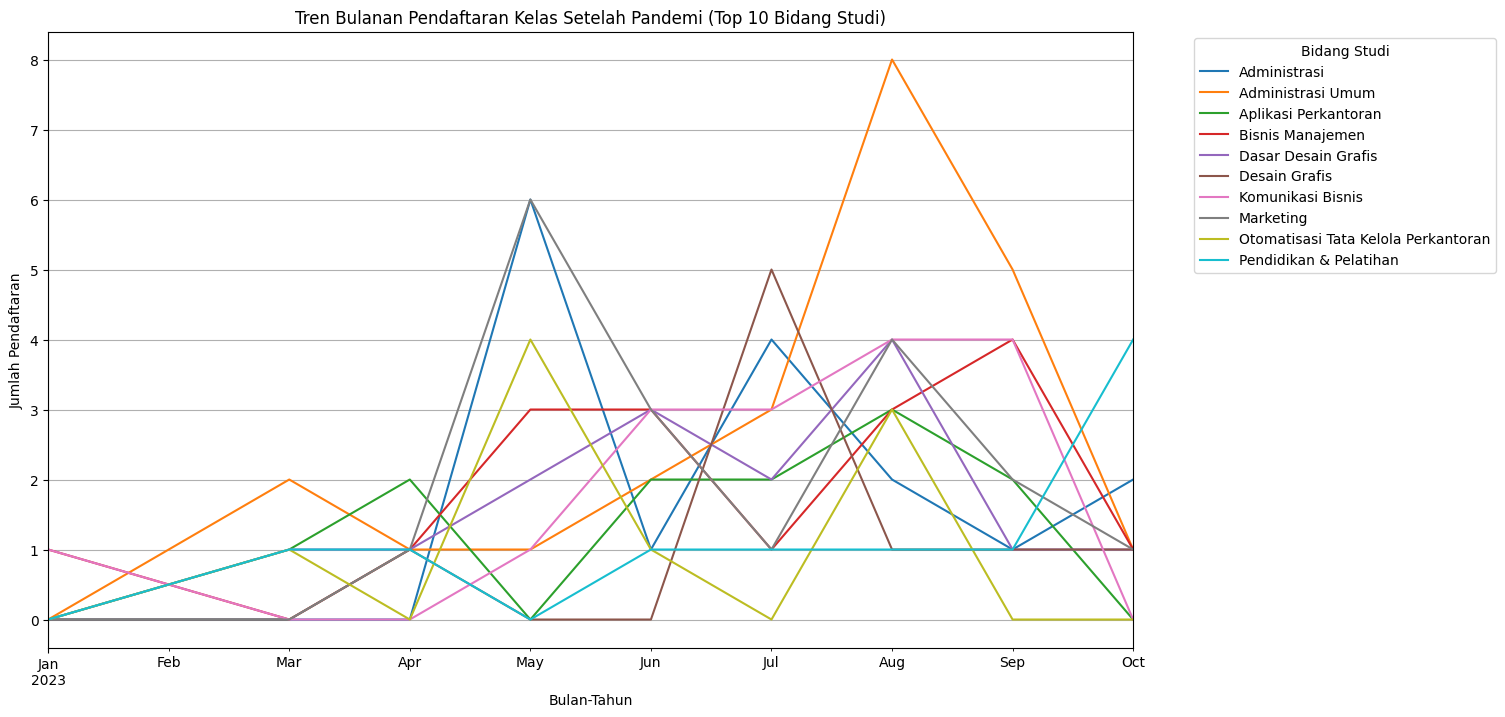

In [ ]:
# Plot tren bulanan setelah pandemi untuk top 10 bidang studi
plt.figure(figsize=(14, 8))
trend_post_pandemic.plot(ax=plt.gca(), title='Tren Bulanan Pendaftaran Kelas Setelah Pandemi (Top 10 Bidang Studi)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pendaftaran')
plt.legend(title='Bidang Studi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Jika stakeholders ingin memberikan voucher kelas pada pengguna setia platform MasaDepan.ku, berikanlah daftar pengguna yang berpotensi memiliki tingkat redeem voucher yang tinggi, dilihat dari jumlah kelas yang diikuti dan waktu terakhir pengguna mengakses kelas (updated_at)?

In [ ]:
from datetime import datetime, timedelta

# Pastikan kolom tanggal_mendaftar dan tanggal_terakhir_akses dalam format datetime
data_clean2['tanggal_mendaftar'] = pd.to_datetime(data_clean2['tanggal_mendaftar'])
data_clean2['tanggal_terakhir_akses'] = pd.to_datetime(data_clean2['tanggal_terakhir_akses'])

# Tentukan tanggal terbaru dalam dataset
tanggal_terbaru = data_clean2['tanggal_terakhir_akses'].max()
print("Tanggal terakhir dalam data:", tanggal_terbaru)

# Menghitung tanggal batas 3 bulan yang lalu dari tanggal terbaru
tanggal_batas = tanggal_terbaru - timedelta(days=3*30)  # Menggunakan pendekatan 3 bulan = 90 hari
print("Tanggal batas 3 bulan yang lalu:", tanggal_batas)

# Filter data untuk hanya mencakup pengguna yang mengakses dalam 3 bulan terakhir
df_terakhir_3_bulan = data_clean2[data_clean2['tanggal_terakhir_akses'] >= tanggal_batas]
print("Jumlah pengguna yang mengakses dalam 3 bulan terakhir:", len(df_terakhir_3_bulan))

# Menghitung jumlah kelas yang diikuti oleh setiap pengguna
kelas_per_pengguna = df_terakhir_3_bulan.groupby('id_pengguna').size().reset_index(name='jumlah_kelas')

# Menentukan waktu terakhir pengguna mengakses kelas
waktu_terakhir_akses = df_terakhir_3_bulan.groupby('id_pengguna')['tanggal_terakhir_akses'].max().reset_index()

# Menggabungkan informasi jumlah kelas dan waktu terakhir akses
pengguna_aktif = pd.merge(kelas_per_pengguna, waktu_terakhir_akses, on='id_pengguna')

# Filter pengguna yang telah mengikuti lebih dari 1 kelas
pengguna_aktif = pengguna_aktif[pengguna_aktif['jumlah_kelas'] > 1]

# Mengurutkan pengguna berdasarkan jumlah kelas yang diikuti (descending) dan waktu terakhir akses (descending)
pengguna_aktif_sorted = pengguna_aktif.sort_values(by=['jumlah_kelas', 'tanggal_terakhir_akses'], ascending=[False, False])

# Menampilkan daftar pengguna potensial
print("Pengguna Potensial untuk Voucher:")
print(pengguna_aktif_sorted[['id_pengguna', 'jumlah_kelas', 'tanggal_terakhir_akses']])

Tanggal terakhir dalam data: 2023-10-23 16:38:39
Tanggal batas 3 bulan yang lalu: 2023-07-25 16:38:39
Jumlah pengguna yang mengakses dalam 3 bulan terakhir: 1253
Pengguna Potensial untuk Voucher:
                           id_pengguna  jumlah_kelas tanggal_terakhir_akses
657   8b1c48bf3859c9e4450fa643e2bbfa39             2    2023-10-21 03:11:37
113   177decf4333de198b7096770ea98b198             2    2023-10-21 02:24:10
33    06b333762067499ffdd614f1a105aedb             2    2023-10-20 03:27:56
590   7d76245b7eb3397227509f2ae4bbe64a             2    2023-10-20 03:26:45
1076  e08b6250d52bdad742caef3178feffda             2    2023-09-30 04:37:28
951   cc3f9c0a9f6a7c41175cf99db4b852b1             2    2023-09-20 10:11:41
152   1fabcaddb2e050fe074ab27e2a889ccd             2    2023-09-18 16:15:18
537   7294b02b4793728c75d7dd3f7b0caf56             2    2023-09-18 16:15:18
675   8d7616c57cb6388d25a1763e64971d23             2    2023-09-18 16:15:18
876   bab644c17bf66d1aa362a16aaaf50684      

In [ ]:
print('Terdapat',len(pengguna_aktif_sorted),'pengguna yang berhak mendapatkan voucher yang berpotensi memiliki tingkat redeem yang tinggi')

Terdapat 13 pengguna yang berhak mendapatkan voucher yang berpotensi memiliki tingkat redeem yang tinggi


**Insight**

Terdapat **13 pengguna** yang memiliki potensi tinggi untuk mendapatkan voucher dengan **tingkat redeem** yang **tinggi**. Hal ini disebabkan karena pengguna merupakan pengguna yang aktif dan terlibat dalam platform atau program kelas yang ditawarkan. Pengguna-pengguna ini memiliki kecenderungan untuk mengikuti **lebih dari satu kelas** dalam rentang waktu **tiga bulan terakhir**.

Berdasarkan hal tersebut, strategi pemasaran atau promosi dapat difokuskan pada kelompok pengguna ini dengan memberikan penawaran berupa voucher, untuk mendorong mereka melakukan redeem voucher dan mengikuti kelas lainnya.

## Bagaimana persentase tingkat penyelesaian kelas selama pandemi dan setelah pandemi?


In [ ]:
# Konversi kolom 'tanggal_menyelesaikan' ke format datetime
data_clean2['tanggal_menyelesaikan'] = pd.to_datetime(data_clean2['tanggal_menyelesaikan'])

# Filter data selama pandemi (>= April 2020 )
selama_pandemi = data_clean2[data_clean2['tanggal_menyelesaikan'] <='2022-12-31']

# Filter data setelah pandemi (>= 1 Januari 2023)
setelah_pandemi = data_clean2[data_clean2['tanggal_menyelesaikan'] >= '2023-01-01']

# Menentukan penyelesaian kelas berdasarkan apakah aktivitas_selesai sama dengan total_aktivitas
# Hitung jumlah penyelesaian dan ketidakselesaian kelas selama pandemi
penyelesaian_selama_pandemi = selama_pandemi[selama_pandemi['aktivitas_selesai'] == selama_pandemi['total_aktivitas']].shape[0]
tidak_selesai_selama_pandemi = selama_pandemi[selama_pandemi['aktivitas_selesai'] != selama_pandemi['total_aktivitas']].shape[0]
total_selama_pandemi = selama_pandemi.shape[0]

penyelesaian_rate_selama_pandemi = (penyelesaian_selama_pandemi / total_selama_pandemi) * 100 if total_selama_pandemi > 0 else 0
tidak_selesai_rate_selama_pandemi = (tidak_selesai_selama_pandemi / total_selama_pandemi) * 100 if total_selama_pandemi > 0 else 0

# Hitung jumlah penyelesaian dan ketidakselesaian kelas setelah pandemi
penyelesaian_setelah_pandemi = setelah_pandemi[setelah_pandemi['aktivitas_selesai'] == setelah_pandemi['total_aktivitas']].shape[0]
tidak_selesai_setelah_pandemi = setelah_pandemi[setelah_pandemi['aktivitas_selesai'] != setelah_pandemi['total_aktivitas']].shape[0]
total_setelah_pandemi = setelah_pandemi.shape[0]

penyelesaian_rate_setelah_pandemi = (penyelesaian_setelah_pandemi / total_setelah_pandemi) * 100  if total_setelah_pandemi > 0 else 0
tidak_selesai_rate_setelah_pandemi = (tidak_selesai_setelah_pandemi / total_setelah_pandemi) * 100  if total_setelah_pandemi > 0 else 0

# Tampilkan hasil
print(f"Persentase tingkat selesai kelas selama pandemi: {penyelesaian_rate_selama_pandemi:.2f}%")
print(f"Persentase tingkat tidak selesai kelas selama pandemi: {tidak_selesai_rate_selama_pandemi:.2f}%")
print(f"Persentase tingkat selesai kelas setelah pandemi: {penyelesaian_rate_setelah_pandemi:.2f}%")
print(f"Persentase tingkat tidak selesai kelas setelah pandemi: {tidak_selesai_rate_setelah_pandemi:.2f}%")


Persentase tingkat selesai kelas selama pandemi: 55.13%
Persentase tingkat tidak selesai kelas selama pandemi: 44.87%
Persentase tingkat selesai kelas setelah pandemi: 66.57%
Persentase tingkat tidak selesai kelas setelah pandemi: 33.43%


**Insight**

Terdapat peningkatan signifikan dalam tingkat penyelesaian kelas setelah pandemi dibandingkan dengan masa pandemi itu sendiri. **Selama pandemi**, tingkat penyelesaian kelas hanya mencapai 55.13%, sementara **setelah pandemi**, tingkat penyelesaian meningkat menjadi 66.57%. Ini menunjukkan bahwa ada perbaikan dalam pertisipasi pengguna dalam menyelesaikan kelas yang diikuti

Selain itu, data menunjukkan bahwa **selama pandemi**, hampir setengah dari siswa (44.87%) tidak menyelesaikan kelas mereka, sedangkan **setelah pandemi**, hanya sekitar sepertiga (33.43%) siswa yang tidak menyelesaikan kelas. Hal ini menunjukkan bahwa ada upaya yang lebih baik dalam memfasilitasi siswa untuk menyelesaikan kelas mereka setelah pandemi, mungkin melalui penyesuaian strategi pembelajaran atau pemberian dukungan tambahan kepada siswa.

## Bagaimana review kelas dapat mencerminkan kepuasan pengguna saat dan setelah pandemi ?

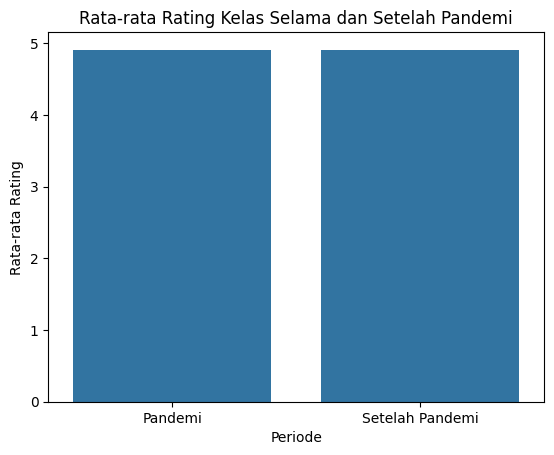

In [ ]:
# Ubah kolom tanggal menjadi datetime
data_clean2['tanggal_mendaftar'] = pd.to_datetime(data_clean2['tanggal_mendaftar'])
data_clean2['tanggal_terakhir_akses'] = pd.to_datetime(data_clean2['tanggal_terakhir_akses'])
data_clean2['tanggal_menyelesaikan'] = pd.to_datetime(data_clean2['tanggal_menyelesaikan'])

# Tentukan periode pandemi
pandemic_start = '2020-04-01'
pandemic_end = '2022-12-31'

# Tambahkan kolom periode
data_clean2['periode'] = ['Pandemi' if pandemic_start <= str(date) <= pandemic_end else 'Setelah Pandemi' for date in data_clean2['tanggal_mendaftar']]

# Hitung peringkat rata-rata
average_rating = data_clean2.groupby('periode')['rating_kelas'].mean()

# Peringkat rata-rata plot
sns.barplot(x=average_rating.index, y=average_rating.values)
plt.title('Rata-rata Rating Kelas Selama dan Setelah Pandemi')
plt.xlabel('Periode')
plt.ylabel('Rata-rata Rating')
plt.show()



In [ ]:
average_rating

,rating_kelas
periode,
Pandemi,4.910531
Setelah Pandemi,4.912530


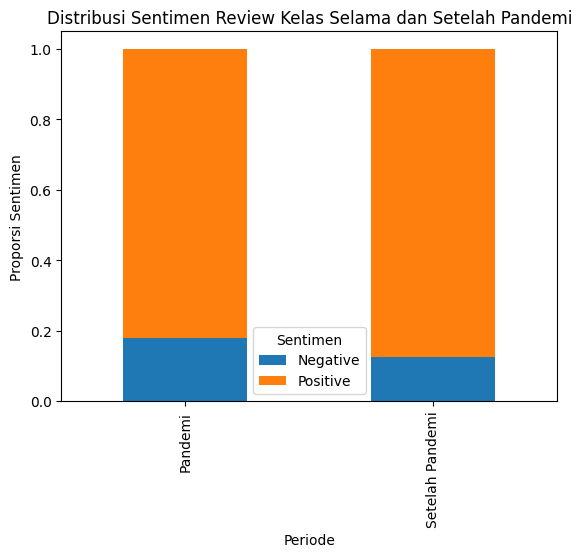

                   rating_kelas  aktivitas_selesai  skor_akhir
rating_kelas           1.000000          -0.010969   -0.048103
aktivitas_selesai     -0.010969           1.000000    0.451468
skor_akhir            -0.048103           0.451468    1.000000


In [ ]:
# Definisikan kata-kata positif
positive_words = ['bagus', 'bermanfaat', 'sangat membantu','mantap','good','keren','terimakasih','mudah','menarik','membantu','sangat baik']

# Berfungsi untuk mengklasifikasikan sentimen ulasan
def classify_sentiment(review):
    review = review.lower()
    if any(word in review for word in positive_words):
        return 'Positive'
    else:
        return 'Negative'

# Terapkan klasifikasi sentimen
data_clean2['review_sentiment'] = data['review_kelas'].apply(classify_sentiment)

# Distribusi sentimen
sentiment_distribution = data.groupby('periode')['review_sentiment'].value_counts(normalize=True).unstack()

# Plot sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Distribusi Sentimen Review Kelas Selama dan Setelah Pandemi')
plt.xlabel('Periode')
plt.ylabel('Proporsi Sentimen')
plt.legend(title='Sentimen')
plt.show()

# Korelasi antara rating dan aktivitas yang diselesaikan
correlation = data[['rating_kelas', 'aktivitas_selesai', 'skor_akhir']].corr()
print(correlation)

In [ ]:
sentiment_distribution

review_sentiment,Negative,Positive
periode,,
Pandemi,0.180277,0.819723
Setelah Pandemi,0.125296,0.874704


In [ ]:
# Menghitung jumlah pengguna dengan sentimen positif dan negatif untuk setiap periode
sentiment_counts_periode = data.groupby(['periode', 'review_sentiment']).size().unstack()

# Menampilkan hasil
sentiment_counts_periode


review_sentiment,Negative,Positive
periode,,
Pandemi,808,3674
Setelah Pandemi,53,370


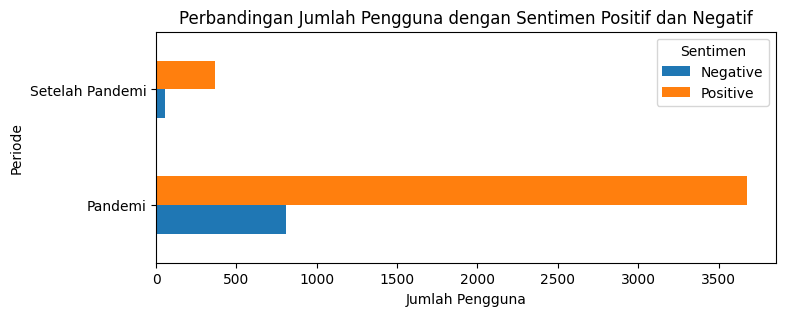

In [ ]:
import matplotlib.pyplot as plt

# Plot bar chart perbandingan horizontal
sentiment_counts_periode.plot(kind='barh', figsize=(8, 3))
plt.title('Perbandingan Jumlah Pengguna dengan Sentimen Positif dan Negatif')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Periode')
plt.legend(title='Sentimen')
plt.show()


**Insight**

Matriks korelasi di atas menunjukkan korelasi antara variabel rating_kelas, aktivitas_selesai, dan skor_akhir.

`Rating Kelas dan Aktivitas Selesai:` Korelasi antara rating_kelas dan aktivitas_selesai adalah -0.010969. Nilai ini mendekati nol, yang menunjukkan bahwa tidak ada korelasi linier yang signifikan antara kedua variabel ini. Artinya, jumlah aktivitas yang diselesaikan oleh peserta tidak berkorelasi secara linier dengan rating kelas yang diberikan.

`Rating Kelas dan Skor Akhir:` Korelasi antara rating_kelas dan skor_akhir adalah -0.048103. Nilai ini juga mendekati nol, menunjukkan bahwa tidak ada korelasi linier yang signifikan antara kedua variabel ini. Ini menunjukkan bahwa rating kelas tidak berkorelasi secara linier dengan performa akademik peserta yang diukur dengan skor akhir.

`Aktivitas Selesai dan Skor Akhir:`Korelasi antara aktivitas_selesai dan skor_akhir adalah 0.451468. Nilai ini menunjukkan adanya korelasi positif yang moderat antara jumlah aktivitas yang diselesaikan oleh peserta dan skor akhir mereka. Artinya, peserta yang menyelesaikan lebih banyak aktivitas cenderung memiliki skor akhir yang lebih tinggi.

`Selama Pandemi:` Jika peserta berhasil mencapai target pembelajaran dan menunjukkan peningkatan dalam skor atau penilaian, ini bisa mencerminkan kepuasan mereka terhadap pembelajaran daring.

`Setelah Pandemi:` Performa akademik yang baik setelah kembali ke lingkungan pembelajaran luring juga dapat mencerminkan kepuasan pengguna terhadap pengalaman belajar.

##Berapa rata-rata usia pengguna selama pandemi dan sesudah pandemi ?

In [ ]:
selama_pandemi = data_clean2[data_clean2['tanggal_mendaftar']>= '2020-04-01']

setelah_pandemi = data_clean2[data_clean2['tanggal_mendaftar']>= '2023-01-01']

selama_pandemi['Usia'] = (pd.to_datetime(selama_pandemi['tanggal_mendaftar']) - pd.to_datetime(selama_pandemi['tanggal_lahir'])).dt.days // 365

setelah_pandemi['Usia'] = (pd.to_datetime(setelah_pandemi['tanggal_mendaftar']) - pd.to_datetime(setelah_pandemi['tanggal_lahir'])).dt.days // 365

# Hitung rata-rata usia selama pandemi
rata_rata_usia_selama_pandemi = selama_pandemi['Usia'].mean()

# Hitung rata-rata usia setelah pandemi
rata_rata_usia_setelah_pandemi = setelah_pandemi['Usia'].mean()

print(f"Rata-rata usia pengguna selama pandemi: {rata_rata_usia_selama_pandemi:.2f} tahun")
print(f"Rata-rata usia pengguna setelah pandemi: {rata_rata_usia_setelah_pandemi:.2f} tahun")

Rata-rata usia pengguna selama pandemi: 29.82 tahun
Rata-rata usia pengguna setelah pandemi: 27.11 tahun


**Insight**

- Rata rata usia pengguna selama pandemi yaitu sekitar di 29 tahun dan setelah pandemi yaitu 27 tahun

##Persentase distribusi jenis kelamin pengguna

Persentase Distribusi Jenis Kelamin:
jenis_kelamin
Laki-laki    50.988787
Perempuan    49.011213
Name: count, dtype: float64


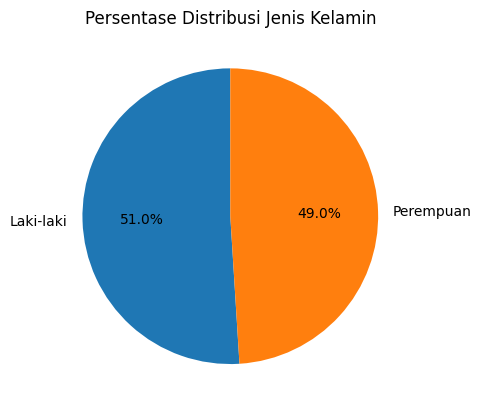

In [ ]:
# Menghitung jumlah pengguna berdasarkan jenis kelamin
gender_counts = data_clean2['jenis_kelamin'].value_counts()

# Menghitung persentase distribusi jenis kelamin
gender_percentage = gender_counts / gender_counts.sum() * 100

# Menampilkan hasil
print("Persentase Distribusi Jenis Kelamin:")
print(gender_percentage)

# Membuat pie chart
plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Distribusi Jenis Kelamin')
plt.show()
